# HWA POST PROCESSING

## Initialisation


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os

import Functions as function

# Directory containing the data
folder_path = '../HWA_data'                     # Adjust based on the actual relative path
folder_path = os.path.normpath(folder_path)     # Normalize path

# THIS NEEDS TO BE CHANGED STILL :)
# Assuming a calibration factor for converting voltage to wind speed (e.g., m/s per volt)
voltage_to_m_per_s = 2.5                        # Example conversion factor

if os.path.exists(folder_path):
    files = [f for f in os.listdir(folder_path) if f.startswith('Measurement') and 'aoa0' in f]
    # Sort files based on the numeric value extracted from filenames
    files = sorted(files, key=function.file_sorter)


## Plotting the data


So in order to plot the data bla bla bla

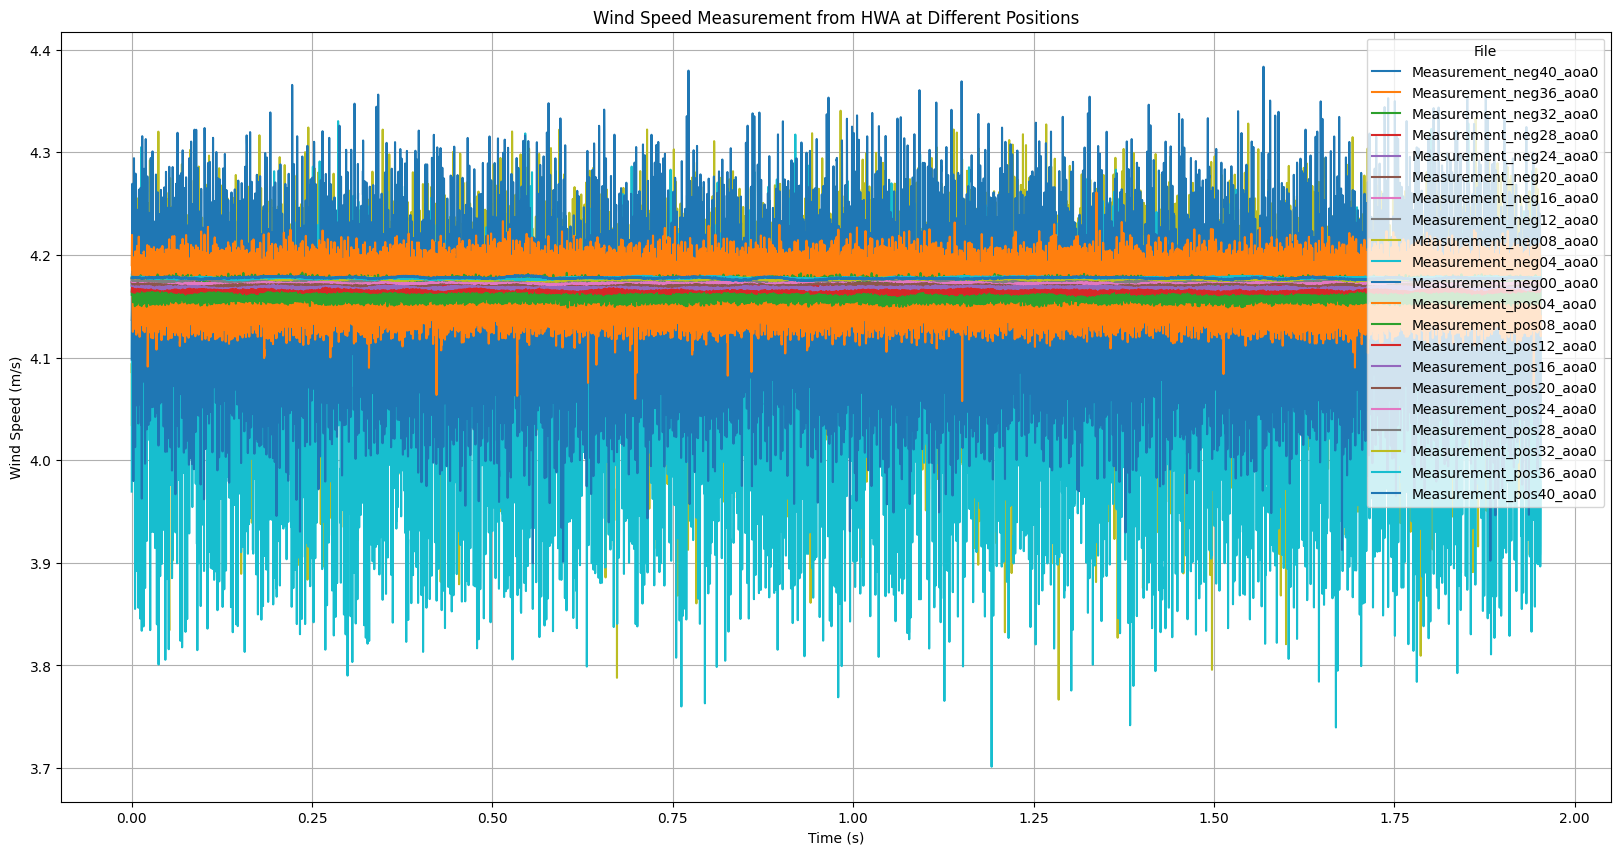

In [7]:
plt.figure(figsize=(20, 10))

# Loop through each file and plot the data
for file_name in files:
    file_path = os.path.join(folder_path, file_name)
    try:
        # Load the data from the text file, skipping the first 23 lines and setting column names manually
        data = pd.read_csv(file_path, sep="\t", skiprows=23, header=None, names=['X_Value', 'Voltage'])
        
        # Convert voltage readings to speed using the calibration factor
        data['Speed (m/s)'] = data['Voltage'] * voltage_to_m_per_s
        
        # Plot the data
        plt.plot(data['X_Value'], data['Speed (m/s)'], label=file_name[:-4])  # Trim '.txt' from label
    except Exception as e:
        print(f"Failed to read file {file_path}: {e}")
        
plt.title('Wind Speed Measurement from HWA at Different Positions')
plt.xlabel('Time (s)')
plt.ylabel('Wind Speed (m/s)')
plt.legend(title="File", loc='upper right')
plt.grid(True)
plt.show()